In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Represents the problem target function, that is, a line defined by two points from [-1,1]x[-1,1]
def get_target_function():
    return np.random.uniform(-1,1,(2,2))

class Dataset:
    # Problem train dataset consisting of each problem point x and its class (0,1)
    def __init__(self, num_samples, target_function):
        self.x = np.random.uniform(-1,1,(num_samples,2))
        self.y = np.array([self.__get_side(point, target_function) for point in self.x])
        
    # Get the side the given point lies in with respect to the line
    def __get_side(self, point, line):
        if (((point[0]-line[0,0])*(line[1,1]-line[0,1]))-((point[1]-line[0,1])*(line[1,0]-line[0,0]))>0):
            return 1
        else:
            return -1
    
    def plot_dataset(self, target_function):
        # Points on the line defined by target function between x = -1 and x = 1
        m = (target_function[1,1]-target_function[0,1])/(target_function[1,0]-target_function[0,0])
        b = target_function[0,1]-m*target_function[0,0]
        x_target_line = np.linspace(-1,1,100000)
        y_target_line = m*(x_target_line)+b
        # Colour the regions above and below the line
        plt.fill_between(x_target_line, y_target_line, min(y_target_line.min(), self.x[:,1].min()), alpha=.3)
        plt.fill_between(x_target_line, y_target_line, max(y_target_line.max(), self.x[:,1].max()), alpha=.3)
        
        # Plot class 0 (y=-1) as circles
        class_0_idx = np.argwhere(train_dataset.y == -1)
        class_1_idx = np.argwhere(train_dataset.y == 1)
        
        plt.scatter(self.x[class_0_idx,0], self.x[class_0_idx,1], marker='^')
        plt.scatter(self.x[class_1_idx,0], self.x[class_1_idx,1], marker='o')
        plt.show()

In [3]:
class Perceptron:
    
    def __init__(self, num_input_points):
        self.weights = np.zeros(num_input_points)
        self.bias = 0
        
    def __sign__(self, a):
        get_sign = lambda y: 1 if (y >= 0) else -1
        get_sign_vectorized = np.vectorize(get_sign) 
        return get_sign_vectorized(a)
    
    def __update_weights__(self, x, y):
        self.weights += x*y
        self.bias += y 
        
    def classify(self, x):
        return self.__sign__(np.sum(x*self.weights, axis=1)+self.bias)
    
    # Problem asks for the number of epochs, thats why we return its value
    def train(self, x, y_real):
        convergence = False
        n_epochs = 0
        while(not convergence):
            n_epochs += 1
            y_pred = self.classify(x)
            missclasified_idx = np.argwhere(y_real != y_pred).flatten()
            if (missclasified_idx.size != 0):
                random_missclassified_idx = np.random.choice(missclasified_idx)
                self.__update_weights__(x[random_missclassified_idx], y_real[random_missclassified_idx])
            else:
                convergence = True
        
        return n_epochs

### Problem scenario


Target function is a line that separates the input space [-1,1]x[-1,1] into two different regions. 
Each point of the dataset belongs to one of the regions. Its class represents the region.

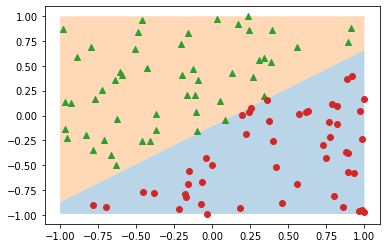

In [11]:
target_function = get_target_function()
train_dataset = Dataset(100, target_function)
train_dataset.plot_dataset(target_function)

#### Exercise 7 and 8

In [5]:
dataset_size = 10

#### Exercise 9 and 10

In [6]:
dataset_size = 100

To get the **number of epochs needed for convergence** just execute the cell bellow and choose the dataset size

In [7]:
n_epochs = []
num_samples = 1000

for i in range(num_samples):
    
    print("Running sample ["+str(i)+"]\r", end='', flush=True)

    target_function = get_target_function()
    train_dataset = Dataset(dataset_size, target_function)

    perceptron = Perceptron(2)
    n_epochs.append(perceptron.train(train_dataset.x, train_dataset.y))

print("Number of epochs needed for convergence for N="+str(dataset_size)+": "+str(np.mean(np.array(n_epochs))))

Number of epochs needed for convergence for N=100: 107.721


Get **P[f(x)!=g(x)]** (Classification error).

__Note__: *To make results more robust, for each run we classify 1000 test points and get the error. Then we get the error mean of all runs.*

In [8]:
error = []
num_samples = 1000

for i in range(num_samples):
    
    print("Running sample ["+str(i)+"]\r", end='', flush=True)

    # Train the perceptron
    target_function = get_target_function()
    train_dataset = Dataset(dataset_size, target_function)
    perceptron = Perceptron(2)
    perceptron.train(train_dataset.x, train_dataset.y)

    # Classification
    test_dataset = Dataset(num_samples, target_function)
    test_pred = perceptron.classify(test_dataset.x)

    missclasified = np.argwhere(test_dataset.y != test_pred).flatten().size
    err = (missclasified*100/num_samples/100)
    error.append(err)
    
print("Error probability after "+str(num_samples)+" samples for N="+str(dataset_size)+": "+str(np.mean(np.array(error))))

Error probability after 1000 samples for N=100: 0.013251
